In [8]:
import numpy as np
import pandas as pd

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv(r"C:\Users\nagar\Downloads\mcdonalds.csv")

In [7]:
data.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [11]:
data.shape

(1453, 15)

In [12]:
data.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


MD_x = (data.iloc[:, :11] == "Yes").astype(int)


In [13]:
MD_x = (data.iloc[:, :11] == "Yes").astype(int)

In [14]:
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [15]:
print(np.round(MD_x.mean(), 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [16]:
MD_pca = PCA(n_components=MD_x.shape[1])
MD_pca.fit(MD_x)

PCA(n_components=11)

In [17]:
print(MD_pca.explained_variance_ratio_)

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [18]:
print(np.round(MD_pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


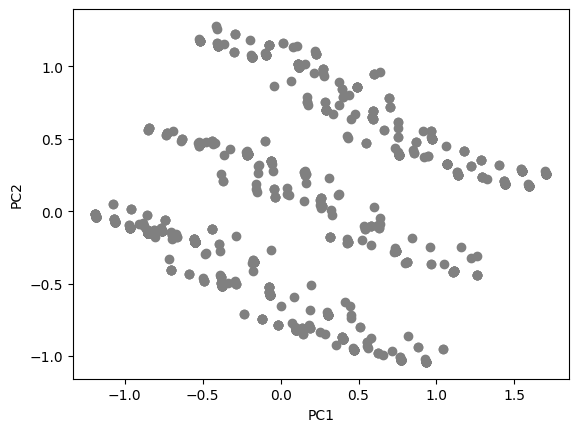

In [19]:
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [21]:

MD_km28 = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)]


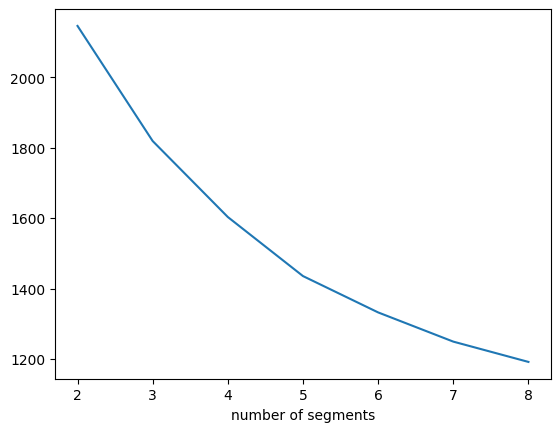

In [22]:
# Plot the number of segments
plt.plot(range(2, 9), [km.inertia_ for km in MD_km28])
plt.xlabel("number of segments")
plt.show()

In [23]:
MD_b28 = [KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in range(2, 9)]
ari = [adjusted_rand_score(MD_x.index, km.labels_) for km in MD_b28]


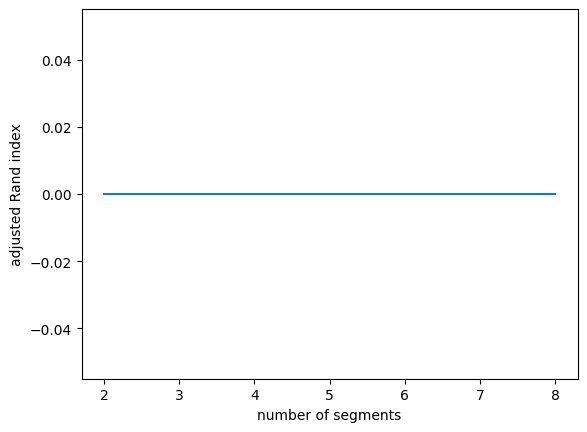

In [24]:
# Plot the adjusted Rand index
plt.plot(range(2, 9), ari)
plt.xlabel("number of segments")
plt.ylabel("adjusted Rand index")
plt.show()

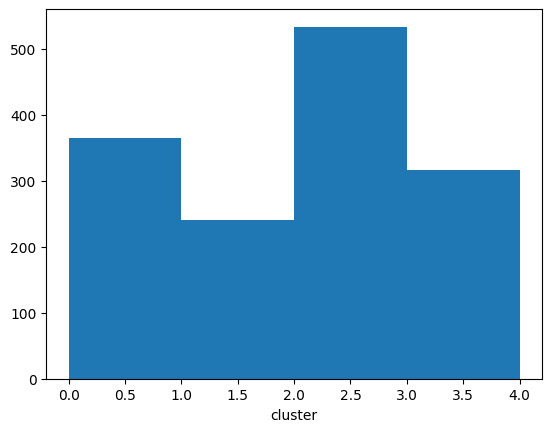

In [25]:
plt.hist(MD_km28[2].labels_, bins=4, range=(0, 4))
plt.xlabel("cluster")
plt.show()

In [26]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt


In [27]:
MD_k4 = MD_km28["4"]

TypeError: list indices must be integers or slices, not str

In [29]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Extract the 4th cluster from the MD.km28 object
#MD_k4 = MD_km28["4"]

# Perform slswFlexclust on MD.x and MD.k4
#MD_r4 = slswFlexclust(MD_x, MD_k4)

# Plot the segment stability
plt.figure()
plt.plot(MD_r4)
plt.xlabel("segment number")
plt.ylabel("segment stability")
plt.ylim(0, 1)

# Perform stepFlexmix on MD.x
np.random.seed(1234)
MD_m28 = stepFlexmix(MD_x, model=GaussianMixture(), n_components=range(2, 9), n_init=10, verbose=False)
print(MD_m28)

# Plot the information criteria
plt.figure()
plt.plot(range(2, 9), MD_m28.bic(MD_x), label="BIC")
plt.plot(range(2, 9), MD_m28.aic(MD_x), label="AIC")
plt.xlabel("Number of components")
plt.ylabel("Value of information criteria")
plt.legend()

# Get the 4th model from MD_m28
MD_m4 = MD_m28.get_model(3)

# Compare the clusters from kmeans and mixture model
kmeans_clusters = MD_k4.labels_
mixture_clusters = MD_m4.predict(MD_x)
print(pd.crosstab(kmeans_clusters, mixture_clusters))

# Fit a new mixture model using the kmeans clusters
MD_m4a = flexmix(MD_x, cluster=kmeans_clusters, model=GaussianMixture())
print(pd.crosstab(kmeans_clusters, MD_m4a.predict(MD_x)))



NameError: name 'slswFlexclust' is not defined